In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df=pd.read_csv('/content/Wine_clust .csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

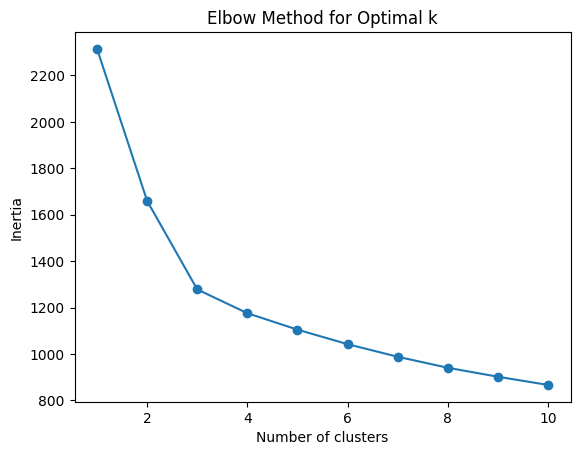

In [4]:
# Find the optimum number of clusters using the elbow method
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [5]:
# Choose the optimal k
optimal_k = 3
# Create the KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


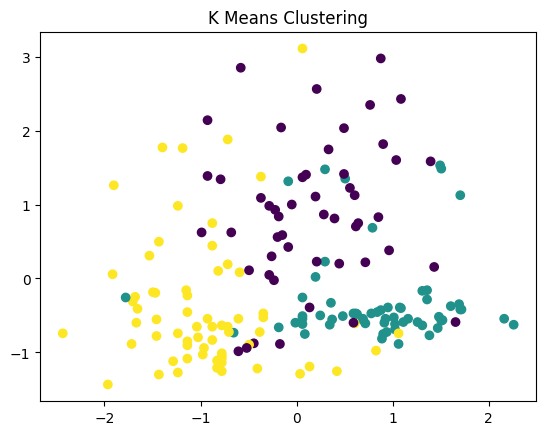

In [21]:
# Plot K Means clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K Means Clustering')
plt.show()

Hierarchical clustering-Agglomerative clustering

In [6]:
#select feature variables
X=df.iloc[:,[0,1]]
X.head()

,Alcohol,Malic_Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [7]:
#use the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
def plot_dendrogram(X):
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Wine')
    plt.ylabel('Euclidean distances')
    plt.show()

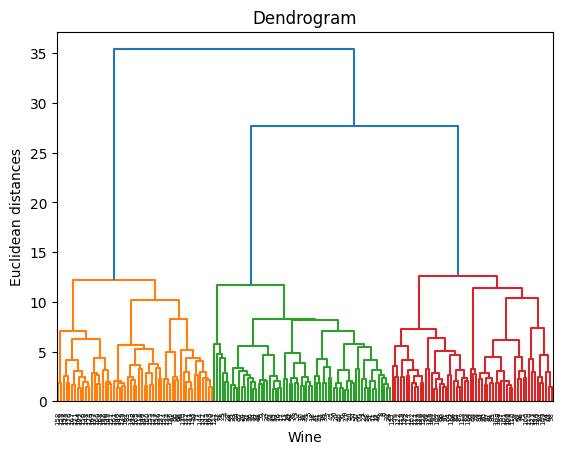

In [8]:
# Find optimal number of clusters for Agglomerative Clustering
plot_dendrogram(X_scaled)

# Based on the dendrogram, let's choose the number of clusters for Agglomerative Clustering
optimal_agg_clusters = 3

In [11]:
import sklearn.cluster
# Create and fit the clustering models with the optimal number of clusters
agg = sklearn.cluster.AgglomerativeClustering(n_clusters=optimal_agg_clusters)
agg_labels = agg.fit_predict(X_scaled)

In [12]:
print("Agglomerative Labels:", agg_labels)

Agglomerative Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


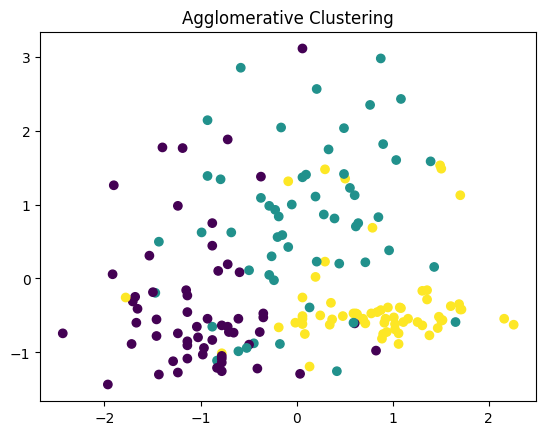

In [20]:
# Plot Agglomerative clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

DBSCAN Clustering

In [13]:
# Function to find optimum parameters for DBSCAN
from sklearn.metrics import silhouette_score
def find_optimal_dbscan(X):
    eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]
    min_samples_values = [2, 5, 10, 15, 20]

    silhouette_scores = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(X)

            # Check for noise points
            if len(set(dbscan.labels_)) > 1:
                silhouette_scores.append(silhouette_score(X, dbscan.labels_))
            else:
                silhouette_scores.append(-1)

    optimal_params = np.unravel_index(np.argmax(silhouette_scores), (len(eps_values), len(min_samples_values)))
    optimal_eps = eps_values[optimal_params[0]]
    optimal_min_samples = min_samples_values[optimal_params[1]]

    return optimal_eps, optimal_min_samples

In [16]:
# Find optimal parameters for DBSCAN
from sklearn.cluster import DBSCAN
optimal_eps, optimal_min_samples = find_optimal_dbscan(X_scaled)
print(f"Optimal parameters for DBSCAN - Eps: {optimal_eps}, Min Samples: {optimal_min_samples}")

Optimal parameters for DBSCAN - Eps: 2.0, Min Samples: 10


In [17]:
# Create DBSCAN model with optimal parameters
dbscan_model = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan_model.fit_predict(X_scaled)


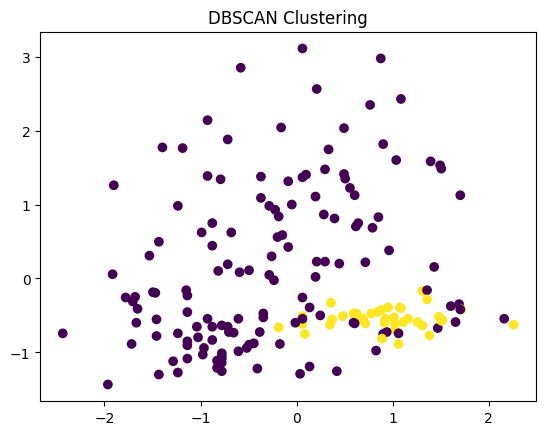

In [18]:
# Plot DBSCAN clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()